In [ ]:
import pandas as pd
import numpy as np

In [163]:
df = pd.read_csv('../../data/data_preprocessed_new.csv', index_col=None, sep=';')
df

,user_id,gender,age,country,city,exp_group,os,source,post_id,time,topic,action,tfidf_sum,tfidf_mean,tfidf_max,user_likes,post_likes,topic_favourite
0,200,1,34,0,651,3,0,0,5181,1641116672000,0,0,6.315479,0.001488,0.375393,3,107,0
1,200,1,34,0,651,3,0,0,5228,1641116658000,0,0,5.638878,0.001329,0.491565,3,43,0
2,200,1,34,0,651,3,0,0,5319,1641116635000,0,0,10.482928,0.002470,0.262795,3,236,0
3,200,1,34,0,651,3,0,0,5379,1641116627000,0,0,11.189221,0.002636,0.194437,3,11,0
4,200,1,34,0,651,3,0,0,5361,1641116582000,0,0,12.599472,0.002969,0.266056,3,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1631929,168552,1,16,0,1061,4,0,1,7094,1643050396000,0,1,11.687211,0.002754,0.320822,3,630,0
1631930,168552,1,16,0,1061,4,0,1,6846,1643050366000,0,1,9.575619,0.002256,0.269894,3,2380,0
1631931,168552,1,16,0,1061,4,0,1,7097,1643050313000,0,1,6.197824,0.001460,0.477146,3,1964,0
1631932,168552,1,16,0,1061,4,0,1,7094,1643050306000,0,0,11.687211,0.002754,0.320822,3,630,0


In [164]:
df.drop(['user_id'], axis=1, inplace=True)

In [165]:
df

,gender,age,country,city,exp_group,os,source,post_id,time,topic,action,tfidf_sum,tfidf_mean,tfidf_max,user_likes,post_likes,topic_favourite
0,1,34,0,651,3,0,0,5181,1641116672000,0,0,6.315479,0.001488,0.375393,3,107,0
1,1,34,0,651,3,0,0,5228,1641116658000,0,0,5.638878,0.001329,0.491565,3,43,0
2,1,34,0,651,3,0,0,5319,1641116635000,0,0,10.482928,0.002470,0.262795,3,236,0
3,1,34,0,651,3,0,0,5379,1641116627000,0,0,11.189221,0.002636,0.194437,3,11,0
4,1,34,0,651,3,0,0,5361,1641116582000,0,0,12.599472,0.002969,0.266056,3,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1631929,1,16,0,1061,4,0,1,7094,1643050396000,0,1,11.687211,0.002754,0.320822,3,630,0
1631930,1,16,0,1061,4,0,1,6846,1643050366000,0,1,9.575619,0.002256,0.269894,3,2380,0
1631931,1,16,0,1061,4,0,1,7097,1643050313000,0,1,6.197824,0.001460,0.477146,3,1964,0
1631932,1,16,0,1061,4,0,1,7094,1643050306000,0,0,11.687211,0.002754,0.320822,3,630,0


In [166]:
### Разделим выборку на train-test

df = df.sort_values("time")

df_test_size = df.shape[0] // 5




In [167]:
df.drop(['time'], axis=1, inplace=True)

In [168]:
df_train = df.iloc[:-df_test_size].copy()
df_test = df.iloc[-df_test_size:].copy()

In [169]:
X_train = df_train.drop('action', axis=1)
X_test = df_test.drop('action', axis=1)

y_train = df_train['action']
y_test = df_test['action']

In [172]:
X_train

,gender,age,country,city,exp_group,os,source,post_id,topic,tfidf_sum,tfidf_mean,tfidf_max,user_likes,post_likes,topic_favourite
52179,1,31,1,2767,0,0,0,351,6,7.262442,0.001711,0.480502,3,1,6
52178,1,31,1,2767,0,0,0,166,6,5.766827,0.001359,0.613666,3,1,6
52177,1,31,1,2767,0,0,0,335,6,5.035218,0.001186,0.458863,3,0,6
52176,1,31,1,2767,0,0,0,200,6,7.720950,0.001819,0.322814,3,0,6
52175,1,31,1,2767,0,0,0,288,6,6.425815,0.001514,0.314733,3,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544440,0,17,0,2703,4,0,0,6958,0,8.306367,0.001957,0.266245,4,416,0
1388176,0,22,0,2703,4,1,1,7052,0,10.479816,0.002469,0.285552,1,865,0
1003805,1,24,0,1953,3,0,0,7074,0,7.253893,0.001709,0.573277,2,1655,0
249365,0,28,0,2703,3,0,0,7051,0,3.669764,0.000865,0.459288,2,1384,0


In [173]:
from catboost import CatBoostClassifier


catBoost = CatBoostClassifier(
    loss_function='Logloss',
    verbose=100
)

catBoost.fit(X_train, y_train)

Learning rate set to 0.220484
0:	learn: 0.5528990	total: 127ms	remaining: 2m 6s
100:	learn: 0.4329739	total: 8.49s	remaining: 1m 15s
200:	learn: 0.4322895	total: 16.9s	remaining: 1m 6s
300:	learn: 0.4317114	total: 25.2s	remaining: 58.4s
400:	learn: 0.4311617	total: 33.3s	remaining: 49.8s
500:	learn: 0.4306248	total: 41.6s	remaining: 41.4s
600:	learn: 0.4301379	total: 49.7s	remaining: 33s
700:	learn: 0.4296371	total: 57.9s	remaining: 24.7s
800:	learn: 0.4292033	total: 1m 6s	remaining: 16.4s
900:	learn: 0.4287393	total: 1m 14s	remaining: 8.15s
999:	learn: 0.4283041	total: 1m 22s	remaining: 0us


In [174]:
from sklearn.metrics import classification_report, f1_score, roc_curve, auc

y_pred = catBoost.predict(X_test)
print(classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.819     0.990     0.896    265549
           1      0.499     0.045     0.083     60837

    accuracy                          0.814    326386
   macro avg      0.659     0.517     0.490    326386
weighted avg      0.759     0.814     0.745    326386



In [175]:
fpr, tpr, thresholds = roc_curve(y_test, catBoost.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
print(f'ROC_AUC = {roc_auc.round(3)}')

ROC_AUC = 0.719


Text(0.5, 1.0, 'Feature Importance')

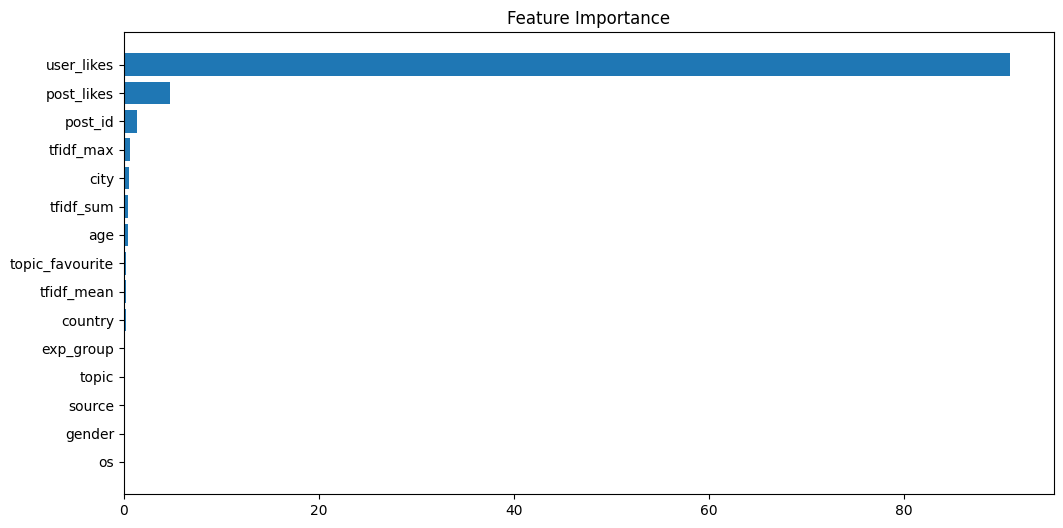

In [176]:
import matplotlib.pyplot as plt

feature_importance = catBoost.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')

Save Catboost model

In [177]:
catBoost.save_model('catBoost_classifier', format='cbm')

In [178]:
sum(y_test)

60837

In [179]:
sum(catBoost.predict_proba(X_test)[:, 1])

63383.97603820508

In [180]:
y_predicted_proba = catBoost.predict_proba(X_test)
y_predicted_proba

array([[9.99992639e-01, 7.36144628e-06],
       [8.87415502e-01, 1.12584498e-01],
       [9.99995479e-01, 4.52129533e-06],
       ...,
       [7.43959748e-01, 2.56040252e-01],
       [7.09611629e-01, 2.90388371e-01],
       [8.56176490e-01, 1.43823510e-01]])